In [27]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

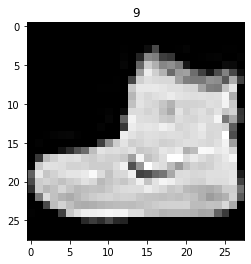

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap="gray")
plt.title(train_labels[0])

In [29]:
def get_preprocessed_image(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_x, train_y = get_preprocessed_image(train_images, train_labels)
#val_x, val_y = get_preprocessed_image(test_images, test_labels)

In [30]:
from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y)
#val_y = to_categorical(val_y)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

image_size = 28

model = Sequential([
    Flatten(input_shape=(image_size, image_size)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 32)                25120     
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [35]:
epochs = 30
batch_size = 32

history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2960 - accuracy: 0.8922 - val_loss: 0.3592 - val_accuracy: 0.8716
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2878 - accuracy: 0.8949 - val_loss: 0.3623 - val_accuracy: 0.8673
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2852 - accuracy: 0.8939 - val_loss: 0.3686 - val_accuracy: 0.8627
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2803 - accuracy: 0.8964 - val_loss: 0.3606 - val_accuracy: 0.8719
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2755 - accuracy: 0.8976 - val_loss: 0.3705 - val_accuracy: 0.8699
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2699 - accuracy: 0.9003 - val_loss: 0.3780 - val_accuracy: 0.8666
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2673 - accuracy: 0.9013 - val_loss: 0.3519 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

plt.